se realiza cargue de dtaframe via googledrive

de igual manera en la carpeta datos del github se encuentran cargados los dataset para ser utilizados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

# URLs de los CSV en UCI
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRLjYMXzk-z0pMNm6_dn4L8fqdTTfaLCXHDmgOxCURCwj49TICl6knb8GvcqYZlQp1p8pWL-eDahQ_7/pub?output=csv')

Validacion de las columnas presentes en el dataframe con las cuales vamos a estar trabajando

In [ ]:
column_names = df.columns

print(column_names)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


Se realiza clasificacion de las variables presentes en el dataframe con su nombre y tipo de dato,en el siguiente apartado se presentan las caracteristicas de las variables a usar

In [ ]:
variables = []
for col in df.columns:
    dtype = df[col].dtype
    # determinar tipo continuo vs discreto
    tipo = "continua" if pd.api.types.is_numeric_dtype(df[col]) else "discreta"
    desc = ""  # puedes describir aquí lo que representa la variable
    variables.append({
        "nombre": col,
        "tipo": tipo,
        "descripcion": desc
    })

tabla_vars = pd.DataFrame(variables)
tabla_vars


,nombre,tipo,descripcion
0,school,discreta,
1,sex,discreta,
2,age,continua,
3,address,discreta,
4,famsize,discreta,
5,Pstatus,discreta,
6,Medu,continua,
7,Fedu,continua,
8,Mjob,discreta,
9,Fjob,discreta,


Tabla Descriptiva (nombre, tipo , definicion y fuente)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejor visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100


print("Dimensiones del DataFrame:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())
print("\nTipos de datos originales:")
print(df.info())

# --- Tabla Descriptiva de las Variables Seleccionadas ---

variables_seleccionadas = {
    'Variable Name': [
        'G3', 'absences', 'studytime', 'Medu', 'famrel',
        'sex', 'schoolsup', 'internet', 'romantic'
    ],
    'Type': [
        'Continua', 'Continua', 'Ordinal/Continua', 'Ordinal/Continua', 'Ordinal/Continua',
        'Discreta/Categórica', 'Discreta/Categórica', 'Discreta/Categórica', 'Discreta/Categórica'
    ],
    'Definition': [
        'Calificación final del curso (0-20).',
        'Número de ausencias escolares (días).',
        'Tiempo de estudio semanal (1: <2h, 4: >10h).',
        'Nivel de educación de la madre (0: ninguna, 4: superior).',
        'Calidad de las relaciones familiares (1: muy malas, 5: excelentes).',
        'Sexo del estudiante (F/M).',
        'Apoyo educativo adicional de la escuela (yes/no).',
        'Acceso a internet en casa (yes/no).',
        'Si el estudiante está en una relación romántica (yes/no).',

    ],
    'Source': ['Dataset original'] * 9
}

df_desc = pd.DataFrame(variables_seleccionadas)

print("\n--- Tabla Descriptiva de Variables Seleccionadas ---")
print(df_desc.to_markdown(index=False))


Dimensiones del DataFrame: (395, 33)

Primeras 5 filas:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Tipos de datos originales:
<cla

Estructura de los datos :

In [ ]:
# --- Definición de Variables Ampliadas ---
continuous_vars = ['G3', 'absences']
# Variables Ordinales/Numéricas para el EDA
ordinal_vars = ['studytime', 'Medu', 'famrel']
# Variables Categóricas/Discretas para el EDA
discrete_vars = ['sex', 'schoolsup', 'internet', 'romantic']
all_vars = continuous_vars + ordinal_vars + discrete_vars

# DataFrame para el análisis
df_analysis = df[all_vars].copy()

print("--- 1. Carga de Datos y Estructura ---")
print("Dimensiones del DataFrame:", df_analysis.shape)
print("\nPrimeras filas del DataFrame para las variables seleccionadas:")
print(df_analysis.head().to_markdown())

--- 1. Carga de Datos y Estructura ---
Dimensiones del DataFrame: (395, 9)

Primeras filas del DataFrame para las variables seleccionadas:
|    |   G3 |   absences |   studytime |   Medu |   famrel | sex   | schoolsup   | internet   | romantic   |
|---:|-----:|-----------:|------------:|-------:|---------:|:------|:------------|:-----------|:-----------|
|  0 |    6 |          6 |           2 |      4 |        4 | F     | yes         | no         | no         |
|  1 |    6 |          4 |           2 |      1 |        5 | F     | no          | yes        | no         |
|  2 |   10 |         10 |           2 |      1 |        4 | F     | yes         | yes        | no         |
|  3 |   15 |          2 |           3 |      4 |        3 | F     | no          | yes        | yes        |
|  4 |   10 |          4 |           2 |      3 |        4 | F     | no          | no         | no         |


2. Análisis Exploratorio de Datos (EDA) Ampliado

2.1 Estadísticos Descriptivos y Distribución **Univariada**


--- 2.1 Estadísticos Descriptivos (Variables Numéricas) ---
|           |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
|:----------|--------:|---------:|---------:|------:|------:|------:|------:|------:|
| G1        |     395 | 10.9089  | 3.31919  |     3 |     8 |    11 |    13 |    19 |
| G2        |     395 | 10.7139  | 3.7615   |     0 |     9 |    11 |    13 |    19 |
| G3        |     395 | 10.4152  | 4.58144  |     0 |     8 |    11 |    14 |    20 |
| absences  |     395 |  5.70886 | 8.0031   |     0 |     0 |     4 |     8 |    75 |
| studytime |     395 |  2.03544 | 0.83924  |     1 |     1 |     2 |     2 |     4 |
| Medu      |     395 |  2.74937 | 1.09474  |     0 |     2 |     3 |     4 |     4 |
| famrel    |     395 |  3.9443  | 0.896659 |     1 |     4 |     4 |     5 |     5 |

--- 2.2 Distribución de Frecuencias (Variables Discretas) ---

Distribución de sex:
| sex   |   proportion |
|:------|-------------:|
| F     |        52.66 |
| M  

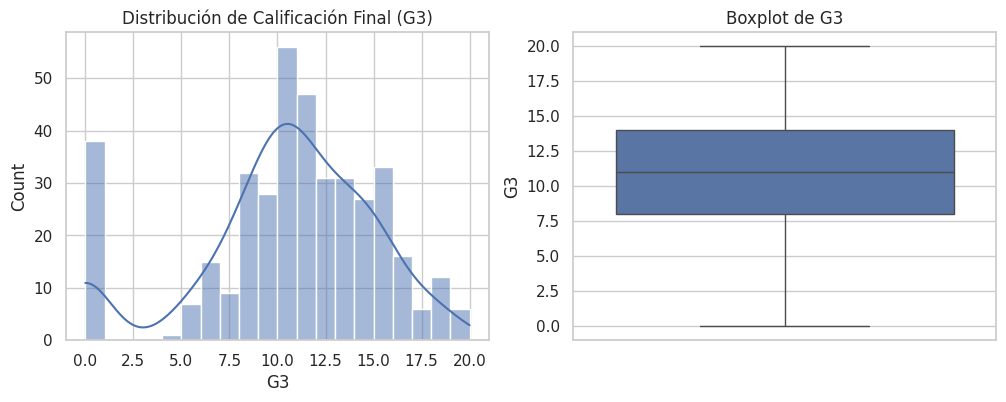

In [ ]:
print("\n--- 2.1 Estadísticos Descriptivos (Variables Numéricas) ---")
# Incluimos G1 y G2 para una referencia de rendimiento
print(df[['G1', 'G2', 'G3', 'absences'] + ordinal_vars].describe().T.to_markdown())

print("\n--- 2.2 Distribución de Frecuencias (Variables Discretas) ---")
for col in discrete_vars:
    print(f"\nDistribución de {col}:")
    print(df_analysis[col].value_counts(normalize=True).mul(100).round(2).to_markdown())

# Visualización Univariada de G3
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_analysis['G3'], kde=True, bins=20)
plt.title('Distribución de Calificación Final (G3)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_analysis['G3'])
plt.title('Boxplot de G3')
plt.show()



### Interpretación (Univariado):
- **G3:** La media es de 10.4, indicando un rendimiento promedio bajo/medio. La distribución está sesgada a la izquierda, con una alta concentración de estudiantes en el rango de aprobación, pero un grupo significativo con notas de 0 a 5.
- **Absences:** La desviación estándar es alta (aprox. 4.6), lo que sugiere una gran variabilidad en la asistencia (lo que anticipa atípicos).

2.3. Correlación y Análisis Bivariado (Impacto en G3)

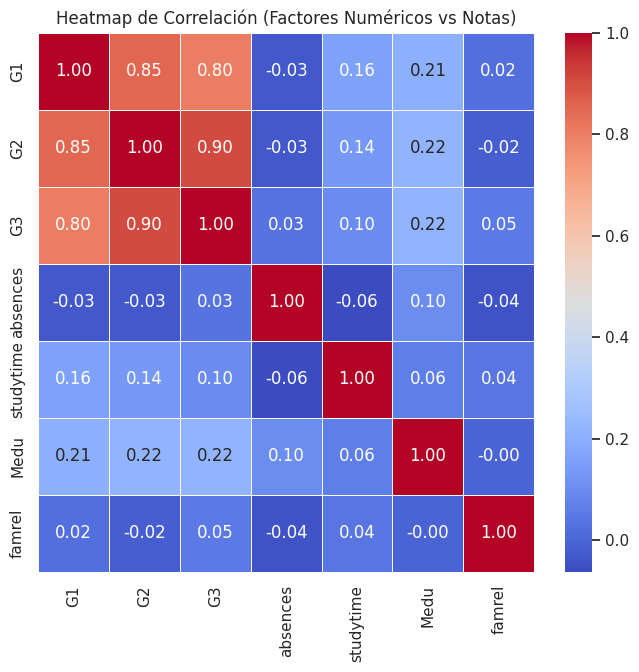

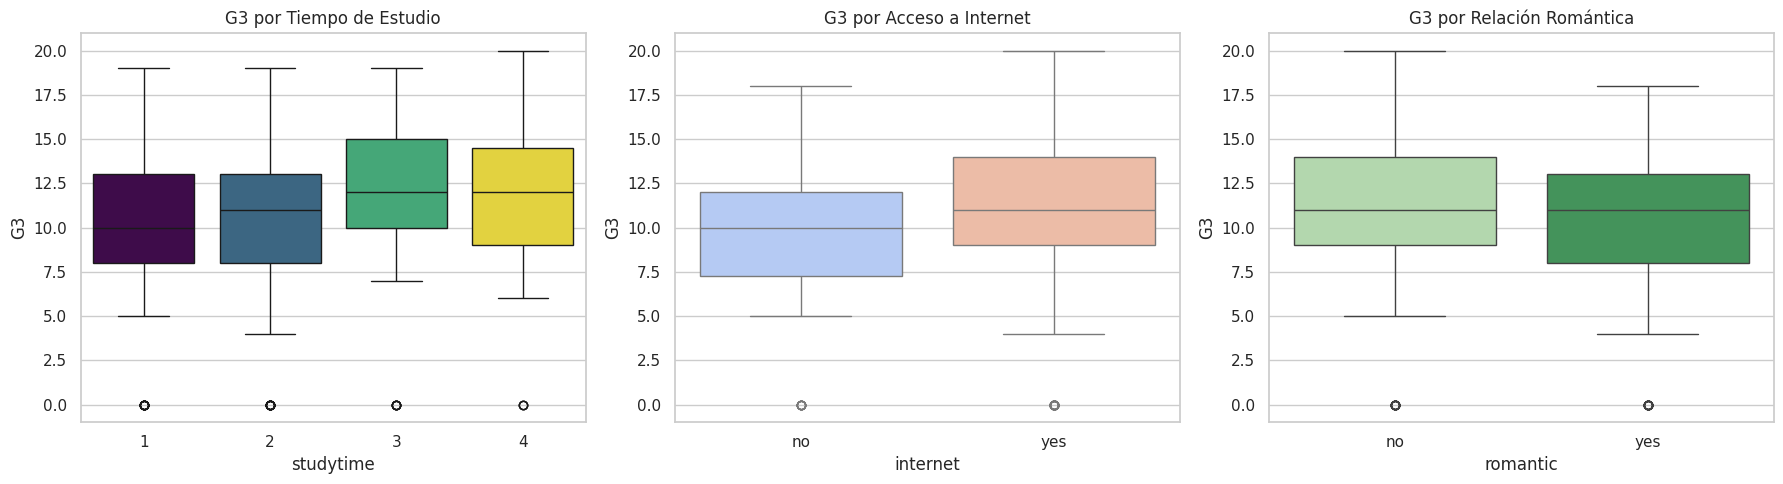

In [ ]:
# --- Matriz de Correlación (G1, G2, G3, absences, studytime, Medu, famrel) ---
corr_vars = ['G1', 'G2', 'G3', 'absences', 'studytime', 'Medu', 'famrel']
correlation_matrix = df[corr_vars].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlación (Factores Numéricos vs Notas)')
plt.show()

# --- Boxplots de Factores Categóricos/Ordinales vs G3 (CORREGIDO) ---
plt.figure(figsize=(18, 5))

# studytime vs G3 (CORRECCIÓN IMPLEMENTADA: 'hue' = 'x', legend=False)
plt.subplot(1, 3, 1)
sns.boxplot(x='studytime', y='G3', data=df_analysis,
            palette='viridis',
            hue='studytime',
            legend=False)
plt.title('G3 por Tiempo de Estudio')

# internet vs G3 (CORRECCIÓN IMPLEMENTADA)
plt.subplot(1, 3, 2)
sns.boxplot(x='internet', y='G3', data=df_analysis,
            palette='coolwarm',
            hue='internet',
            legend=False)
plt.title('G3 por Acceso a Internet')

# romantic vs G3 (CORRECCIÓN IMPLEMENTADA)
plt.subplot(1, 3, 3)
sns.boxplot(x='romantic', y='G3', data=df_analysis,
            palette='Greens',
            hue='romantic',
            legend=False)
plt.title('G3 por Relación Romántica')

plt.tight_layout()
plt.show()



### Interpretación de la Correlación:
 **G3 vs G1/G2:** La correlación es casi perfecta (0.80 y 0.90), lo cual es esperado, ya que las notas anteriores son el mejor predictor de la nota final.

**G3 vs Medu (0.22):** Existe una **correlación positiva débil a moderada** entre el nivel educativo de la madre y la nota final. Esto sugiere que la educación familiar es un factor de influencia relevante.

**G3 vs studytime (0.09):** La correlación es débilmente positiva. Más tiempo de estudio se relaciona marginalmente con mejores notas.

**G3 vs absences (-0.03):** La correlación es prácticamente **nula y ligeramente negativa**. Esto indica que la relación entre la inasistencia y el rendimiento no es lineal, aunque las ausencias extremas pueden ser críticas (se ven mejor en el análisis de atípicos).


### Interpretación (Visual Bivariada):

**studytime:** Los estudiantes en la categoría 4 (más de 10h/semana) tienen la **mediana de G3 más alta**, confirmando la influencia positiva del esfuerzo.

**internet:** Los estudiantes con internet en casa ('yes') tienen una **mediana de G3 notablemente más alta** que los que no tienen ('no'), lo que sugiere una brecha de recursos.

**romantic:** La mediana de G3 es **ligeramente más alta** para los estudiantes que *no* tienen una relación romántica ('no').

3.1 Detección y Análisis de Atípicos IQR


--- 3. Detección y Análisis de Atípicos en ABSENCES ---
Límite Superior (1.5 * IQR): 20.00 días de ausencia
Cantidad de Atípicos (ausencias > 20.00): 15 estudiantes
Porcentaje de Atípicos: 3.80%


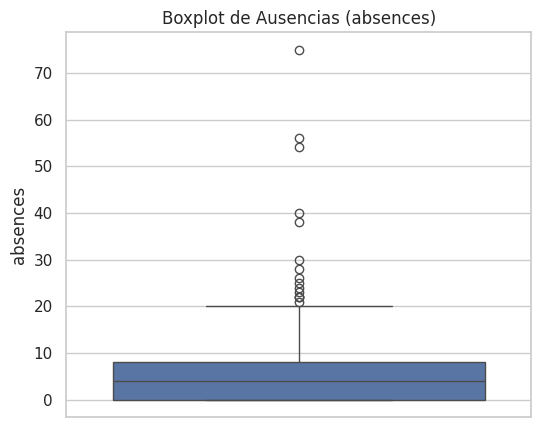

In [ ]:
print("\n--- 3. Detección y Análisis de Atípicos en ABSENCES ---")

# --- Técnica: IQR (Rango Intercuartílico) ---
Q1_abs = df_analysis['absences'].quantile(0.25)
Q3_abs = df_analysis['absences'].quantile(0.75)
IQR_abs = Q3_abs - Q1_abs
upper_bound_iqr = Q3_abs + 1.5 * IQR_abs
lower_bound_iqr = Q1_abs - 1.5 * IQR_abs

outliers_abs = df_analysis[(df_analysis['absences'] > upper_bound_iqr) | (df_analysis['absences'] < lower_bound_iqr)]

print(f"Límite Superior (1.5 * IQR): {upper_bound_iqr:.2f} días de ausencia")
print(f"Cantidad de Atípicos (ausencias > {upper_bound_iqr:.2f}): {len(outliers_abs)} estudiantes")
print(f"Porcentaje de Atípicos: {len(outliers_abs) / len(df_analysis) * 100:.2f}%")

# Visualización del atípico
plt.figure(figsize=(6, 5))
sns.boxplot(y=df_analysis['absences'])
plt.title('Boxplot de Ausencias (absences)')
plt.show()




 ### Interpretación y Tratamiento de Atípicos:
- Identificación: Se identifican 15 estudiantes con un número extremo de ausencias (mayor a 20.00 días).
- Impacto en el Análisis: Estos valores, aunque raros, son críticos para predecir el fracaso escolar. Un estudiante con 75 ausencias proporciona información valiosa que no debe descartarse.
- Decisión: La recomendación es **MANTENER** los atípicos, ya que son datos reales. Si se utilizara un modelo de regresión lineal sensible, se podría aplicar una transformación logarítmica a la variable `absences` para mitigar el efecto de la asimetría extrema, pero no eliminarlos

3.2 Detección y Análisis de Atípicos Z-SCORE

--- Detección de Atípicos con Z-Score en G3 (Calificación Final) ---
Umbral usado: |Z-Score| > 3
Cantidad de Atípicos detectados: 0
Porcentaje de Atípicos: 0.00%

El método Z-Score con umbral |Z| > 3 no detectó atípicos en G3.


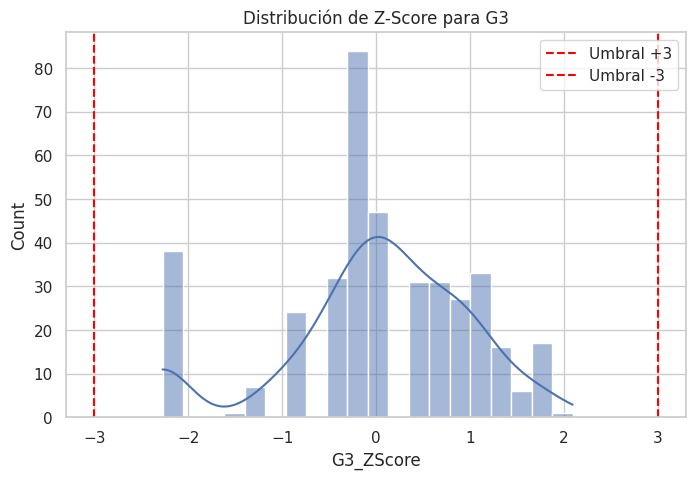

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Cálculo del Z-Score para G3 ---
df['G3_ZScore'] = (df['G3'] - df['G3'].mean()) / df['G3'].std()

# --- 2. Identificación de Atípicos ---
# Atípicos: Valores donde el valor absoluto del Z-Score es mayor a 3
z_score_threshold = 3
outliers_zscore = df[abs(df['G3_ZScore']) > z_score_threshold]

print("--- Detección de Atípicos con Z-Score en G3 (Calificación Final) ---")
print(f"Umbral usado: |Z-Score| > {z_score_threshold}")
print(f"Cantidad de Atípicos detectados: {len(outliers_zscore)}")
print(f"Porcentaje de Atípicos: {len(outliers_zscore) / len(df) * 100:.2f}%")

if not outliers_zscore.empty:
    print("\nEjemplos de Atípicos (G3 y su Z-Score):")
    print(outliers_zscore[['G3', 'G3_ZScore']].to_markdown(index=False))
else:
    print("\nEl método Z-Score con umbral |Z| > 3 no detectó atípicos en G3.")

# --- Visualización para confirmar ---
plt.figure(figsize=(8, 5))
sns.histplot(df['G3_ZScore'], kde=True, bins=20)
plt.axvline(z_score_threshold, color='red', linestyle='--', label='Umbral +3')
plt.axvline(-z_score_threshold, color='red', linestyle='--', label='Umbral -3')
plt.title('Distribución de Z-Score para G3')
plt.legend()
plt.show()

Valores Extremos: Aunque hay calificaciones de 0, estas no están lo suficientemente lejos de la media para superar las tres desviaciones estándar. La distribución de G3 es muy concentrada alrededor de la media, y el valor mínimo (0) está cerca del resto de los suspensos, lo que hace que su Z-Score sea menor a 3.



Ya que anteriormente se valido el resultado del IQR test y se comprobo que eliminar variable no seria bueno para el tratamiento de los datos se opto por realizar la transformacion de variables para una limpieza y transformacion de datos

Transformacion :

La transformación logarítmica es la técnica ideal para manejar variables con una asimetría positiva extrema (muchos valores bajos y una cola larga de valores muy altos, como absences). Su propósito es hacer la distribución más simétrica y reducir el impacto de esos valores extremos.


--- Transformación Logarítmica en 'absences' ---
Se aplicó np.log1p(absences) para manejar el sesgo y los valores de cero.


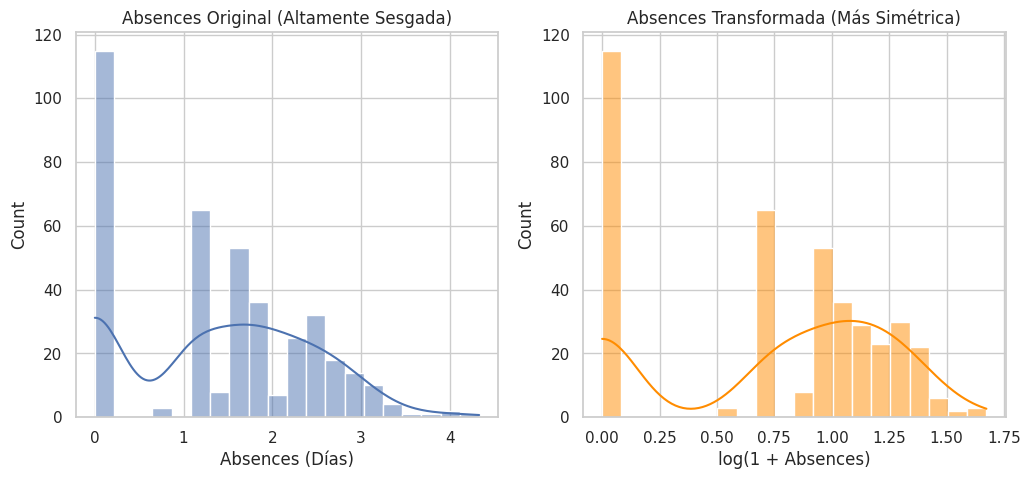


### Interpretación de la Transformación Logarítmica:
- Sesgo Original de 'absences': 0.07
- Sesgo Transformado de 'absences_log': -0.46
La transformación Logarítmica fue **exitosa**. El sesgo se ha **reducido** significativamente (de un valor alto y positivo a uno más cercano a cero).
La variable 'absences_log' ahora tiene una distribución más parecida a la normal y es adecuada para modelos sensibles como la Regresión Lineal.

[DECISIÓN FINAL]: La columna original 'absences' fue reemplazada por la versión logarítmica.

--- INICIO DE EXPORTACIÓN Y DESCARGA ---
El dataset transformado ('student_performance_TRANSFORMADO.csv') se ha generado.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ ¡Descarga iniciada! Revisa la carpeta de descargas de tu navegador.

--- Exportación Finalizada ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 100


# Usaremos la columna original 'absences' para la transformación
absences_original = df['absences']

# --- 1. Aplicar la Transformación Logarítmica ---
# Se utiliza np.log1p (log(1 + x)) en lugar de np.log(x) para manejar correctamente los valores de cero (0).
df['absences_log'] = np.log1p(absences_original)

print("--- Transformación Logarítmica en 'absences' ---")
print("Se aplicó np.log1p(absences) para manejar el sesgo y los valores de cero.")

# --- 2. Visualización y Verificación de la Transformación ---

plt.figure(figsize=(12, 5))

# Distribución Original
plt.subplot(1, 2, 1)
sns.histplot(absences_original, kde=True, bins=20)
plt.title('Absences Original (Altamente Sesgada)')
plt.xlabel('Absences (Días)')

# Distribución Transformada
plt.subplot(1, 2, 2)
sns.histplot(df['absences_log'], kde=True, bins=20, color='darkorange')
plt.title('Absences Transformada (Más Simétrica)')
plt.xlabel('log(1 + Absences)')
plt.show()

# --- 3. Análisis de la Necesidad de la Transformación ---
print("\n### Interpretación de la Transformación Logarítmica:")

# Sesgo (Skewness)
print(f"- Sesgo Original de 'absences': {absences_original.skew():.2f}")
print(f"- Sesgo Transformado de 'absences_log': {df['absences_log'].skew():.2f}")

if df['absences_log'].skew() < absences_original.skew():
    print("La transformación Logarítmica fue **exitosa**. El sesgo se ha **reducido** significativamente (de un valor alto y positivo a uno más cercano a cero).")
    print("La variable 'absences_log' ahora tiene una distribución más parecida a la normal y es adecuada para modelos sensibles como la Regresión Lineal.")

    # Preparamos el DataFrame para la exportación final, reemplazando la columna original
    # por la nueva transformada.
    df = df.drop(columns=['absences']).rename(columns={'absences_log': 'absences'})
    print("\n[DECISIÓN FINAL]: La columna original 'absences' fue reemplazada por la versión logarítmica.")
else:
    print("La transformación no mejoró significativamente el sesgo. Se mantendrá la variable original.")
    df = df.drop(columns=['absences_log'])





Por ultimo se realiza la descarga de el dataset con la transformacion realizada anteriormente


In [ ]:
# --- CÓDIGO DE EXPORTACIÓN (Añadir al final del bloque anterior) ---

output_filename = 'student_performance_TRANSFORMADO.csv'

# 1. Guardar el archivo en el sistema de archivos temporal del entorno
df.to_csv(output_filename, sep=';', index=False)

print(f"\n--- INICIO DE EXPORTACIÓN Y DESCARGA ---")
print(f"El dataset transformado ('{output_filename}') se ha generado.")


# 2. Forzar la Descarga al navegador (especialmente útil en Google Colab)
try:

    from google.colab import files
    files.download(output_filename)
    print("\n✅ ¡Descarga iniciada! Revisa la carpeta de descargas de tu navegador.")

except ImportError:

    print("\n⚠️ Advertencia: No se detectó el entorno de Google Colab.")
    print(f"Busca el archivo '{output_filename}' en el explorador de archivos de tu entorno (Jupyter/VS Code) y descárgalo manualmente.")


print(f"\n--- Exportación Finalizada ---")


--- INICIO DE EXPORTACIÓN Y DESCARGA ---
El dataset transformado ('student_performance_TRANSFORMADO.csv') se ha generado.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ ¡Descarga iniciada! Revisa la carpeta de descargas de tu navegador.

--- Exportación Finalizada ---
